# Data Science Internship - Technical Assignment

## Sina E. Charandabi

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
%cd '/content/drive/My Drive/RevZilla'

/content/drive/My Drive/RevZilla


In [2]:
# EDA
import pandas as pd
import numpy as np
import datetime as dt
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network  import MLPClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import binarize

# NLP
import nltk 
import re 
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

## Data Pre-Processing

#### Data Cleaning

In [ ]:
# Reads the dataset
df = pd.read_csv('ecommerce_data.csv') 

In [ ]:
# Size of data
len(df)

541909

In [ ]:
# View the first rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,channel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Email
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Email
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Email
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Email
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Email


In [ ]:
# View the last rows
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,channel
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,Direct
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,Direct
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,Direct
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,Direct
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France,Direct


In [ ]:
# Description of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
channel        541909 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 37.2+ MB


"InvoiceDate" needs to be of "datetime" format.

In [ ]:
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate'])

In [ ]:
# Summary stats of numeric variables
df[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


Presence of negative values for "Quantity" and "UnitPrice" doesn't make sense.

Let's see how many recorde associte with such discrepancy.

In [ ]:
df[df['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,channel
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,Email
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,Direct


As shown, only two rows associate with negative values of "UnitPrice". 

We remove these two rows. 

In [ ]:
df.drop(index=df[df['UnitPrice']<0].index, inplace = True)

In [ ]:
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,channel
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,Direct
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,Email
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,Direct
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,Direct
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,Direct
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,Direct
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,Paid Social
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,Email
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,Paid Social


In [ ]:
len(df[df['Quantity']<0])*100/len(df)

1.9604839944861387

As shown, only around 2% of rows have skeptical values for "Quantity".

Therefore, it seems reasonable if we exclude rows with these atypical values as well.

In [ ]:
df.drop(index=df[df['Quantity']<0].index, inplace = True)

Lastly, let's see the number of null values in columns.

As indicated below, 
 - Only less than 0.5 % of the values from the "Description"  
 - But 25% of "CustomerID"
 
correspond with null values.

Null values of Description is too small to hurt the following analysis a the expense of discarding the entire associated rows.

Therefore, we remove rows associated with Description but keep the ones for CustomerID.

In [ ]:
df.isnull().sum()*100/len(df)

InvoiceNo       0.000000
StockCode       0.000000
Description     0.111428
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     25.101311
Country         0.000000
channel         0.000000
dtype: float64

In [ ]:
df.drop(index=df[df['Description'].isnull()].index, inplace = True)

#### Creating new variables

It is reasonable to create new columns for _**total price**_ and **_quarter of date_** for future analysis.

In [ ]:
# Add TotalPrice column in the right position
df.insert (6, "TotalPrice", df['Quantity']*df['UnitPrice'])

In [ ]:
# Add Quarter column in the right position
df.insert (6, "Quarter", df['InvoiceDate'].dt.quarter)

Country is of course an important feature for clustering purpose.

A quick review of value counts reveals that European countries are more frequent in data and North America, South America, Asia and Middle East come in the next places. 

Regarding their large cardinality, I'll  _**group countries into continent**_.

In [ ]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [ ]:
# Europe
df['Continent'] = df['Country'].replace(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Iceland',
       'Channel Islands', 'Denmark', 'Sweden', 'Finland', 'Greece',
       'Austria','European Community','Czech Republic','Malta'],'Europe')

In [ ]:
# Asia
df['Continent'] = df['Continent'].replace(['Japan', 'Hong Kong', 'Singapore'],'Asia')

In [ ]:
# Middle East
df['Continent'] = df['Continent'].replace(['Bahrain', 'Israel','Lebanon', 
                                           'United Arab Emirates', 'Saudi Arabia', 'Cyprus'],'MiddleEast')

In [ ]:
# America
df['Continent'] = df['Continent'].replace(['Canada', 'Brazil', 'USA'],'America')

In [ ]:
# Africa
df['Continent'] = df['Continent'].replace(['RSA'],'Africa')

In [ ]:
# Check the esults
df['Continent'].unique()

array(['Europe', 'Asia', 'MiddleEast', 'America', 'Unspecified', 'Africa'],
      dtype=object)

#### Creating dummy variables

For clustering purpose, we need to further pre-process data by assigning dummies to "channel type" and regions which have minimum cardinality

##### Channels

In [ ]:
# Create dummy variables using onehot encoding
# At the moment, I am not dropping one of created dummiesdue to multicolinearity issue
# Because clustering is robust to multi-colinearity. However, I'll discuss it at the anlysis step 

dummy_cat_df = pd.get_dummies(df['channel'])  
df = pd.concat([df, dummy_cat_df], axis = 1) 

##### Continents

In [ ]:
dummy_cat_df = pd.get_dummies(df['Continent']) 
df = pd.concat([df, dummy_cat_df], axis = 1) 

##### Quarters

In [ ]:
# Now, treating with "Quarter", as an object variable, we again need to assign dummies.
dummy_cat_df = pd.get_dummies(df['Quarter']).rename(columns=lambda x: 'Quarter_' + str(x))
df = pd.concat([df, dummy_cat_df], axis=1)

#### Normalizing the continuous variable

We need to normalize TotalPrice which is the only continuous and numeric column for analysis.

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df[['TotalPrice']].values)

In [ ]:
# Add standardized column in the right position
df.insert (8, "TotalPrice_normalized", pd.DataFrame(x_scaled).values)

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Quarter,TotalPrice,TotalPrice_normalized,CustomerID,...,Africa,America,Asia,Europe,MiddleEast,Unspecified,Quarter_1,Quarter_2,Quarter_3,Quarter_4
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,4,15.30,0.000091,17850.0,...,0,0,0,1,0,0,0,0,0,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,4,20.34,0.000121,17850.0,...,0,0,0,1,0,0,0,0,0,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,4,22.00,0.000131,17850.0,...,0,0,0,1,0,0,0,0,0,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,4,20.34,0.000121,17850.0,...,0,0,0,1,0,0,0,0,0,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,4,20.34,0.000121,17850.0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
# save into a new pickle
df.to_pickle("./df1.pkl")

#### Text pre-processing

"Description" column is the only textual variable in data which includes valuable information on product type, and therefore can be effectively used for EDA, clustering, and prediction purposes.

In this regard, we pre-process this column and decompose its lemmas to tokens.

In [ ]:
# lower case the "Description" column
df["Description_lower"] = df["Description"].str.lower()

# remove all characters except for letters
df["Description_just_letters"] = df["Description_lower"].apply(lambda x: re.sub('[^a-zA-Z]',' ',x))

# save the list of stopwords in stop_words
stop_words = set(stopwords.words("english"))

# remove the words that exist in the stopwords dictionary from tweets
df["Description_no_stop_words"] = df["Description_just_letters"].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))

##### Lemmetization

In [ ]:
lemmatizer = nltk.stem.WordNetLemmatizer()
wordnet_lemmatizer = WordNetLemmatizer()
stop = stopwords.words('english')


def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

# Lemmatizing using POS tagging
df['Description_lemmatized'] = df['Description_no_stop_words'].apply(lambda x: lemmatize_sentence(x))

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Month,Quarter,TotalPrice,TotalPrice_normalized,...,Quarter_3,Quarter_4,clusters_1,clusters_2,clusters_3,clusters_4,Description_lower,Description_just_letters,Description_no_stop_words,Description_lemmatized
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,12,4,15.30,0.000091,...,0,1,5,4,3,1,white hanging heart t-light holder,white hanging heart t light holder,white hanging heart light holder,white hang heart light holder
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,12,4,20.34,0.000121,...,0,1,5,4,3,1,white metal lantern,white metal lantern,white metal lantern,white metal lantern
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,12,4,22.00,0.000131,...,0,1,5,4,3,1,cream cupid hearts coat hanger,cream cupid hearts coat hanger,cream cupid hearts coat hanger,cream cupid heart coat hanger
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,12,4,20.34,0.000121,...,0,1,5,4,3,1,knitted union flag hot water bottle,knitted union flag hot water bottle,knitted union flag hot water bottle,knit union flag hot water bottle
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,12,4,20.34,0.000121,...,0,1,5,4,3,1,red woolly hottie white heart.,red woolly hottie white heart,red woolly hottie white heart,red woolly hottie white heart


Although it may seem that lemmetization was a further step, as shown below, it returns different results for around 41% of raw descriptions after basic pre-processing. 

In [ ]:
(df['Description_no_stop_words']!=df['Description_lemmatized']).sum()*100/len(df)

40.72897411111174

In [ ]:
# save to a new pickle
df.to_pickle("./df4.pkl")

#### Ceate Tf_Idf matrix

In [ ]:
# disregard the words that appear in less than 1% of documents
# remove the words that appear in more than 99% of documents
tfidf_vectorizer = TfidfVectorizer(min_df=int(0.01*len(df)), max_df=int(0.99*len(df))) 

my_tfidf = tfidf_vectorizer.fit_transform(df['Description_lemmatized'])

tfidf_pd_df = pd.DataFrame(my_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names())

In [ ]:
tfidf_pd_df.shape

(530691, 89)

In [ ]:
#save as pickle
tfidf_pd_df.to_pickle("./tfidf.pkl")

## EDA

##### Range of date

In [ ]:
# It includes transactions between December of 2010 to December of 2020
df['InvoiceDate'].max()-df['InvoiceDate'].min()

Timedelta('373 days 04:24:00')

##### Distinct Customers

In [ ]:
# We have 4339 distinct customers
df['CustomerID'].value_counts()

17841.0    7847
14911.0    5677
14096.0    5111
12748.0    4596
14606.0    2700
           ... 
15524.0       1
15562.0       1
15657.0       1
15668.0       1
12346.0       1
Name: CustomerID, Length: 4339, dtype: int64

##### Distinct InvoiceNo

In [ ]:
# We have 20134 distinct Invoice 
df['InvoiceNo'].value_counts()

573585    1114
581219     749
581492     731
580729     721
558475     705
          ... 
564564       1
577553       1
561687       1
566556       1
574752       1
Name: InvoiceNo, Length: 20134, dtype: int64

##### Distinct Description

In [ ]:
# We have 4077 distinct Descriptions 
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2327
JUMBO BAG RED RETROSPOT               2115
REGENCY CAKESTAND 3 TIER              2019
PARTY BUNTING                         1707
LUNCH BAG RED RETROSPOT               1594
                                      ... 
GIRLY PINK TOOL SET                      1
ZINC STAR T-LIGHT HOLDER                 1
PURPLE/TURQ FLOWERS HANDBAG              1
wrongly sold (22719) barcode             1
MUMMY MOUSE RED GINGHAM RIBBON           1
Name: Description, Length: 4077, dtype: int64

In [ ]:
# We have 3925 distinct stock code 
df['StockCode'].value_counts()  

85123A    2270
85099B    2115
22423     2019
47566     1707
20725     1595
          ... 
22016        1
90126C       1
85109        1
90020        1
90021        1
Name: StockCode, Length: 3925, dtype: int64

###### Geographical distribution

As shown, 'United Kingdom' is by far the most frequent country, with more than 90% of records.

In [ ]:
df['Country'].value_counts()*100/len(df)

United Kingdom          91.520678
Germany                  1.703816
France                   1.584349
EIRE                     1.487495
Spain                    0.468257
Netherlands              0.445269
Belgium                  0.382709
Switzerland              0.370649
Portugal                 0.282839
Australia                0.223294
Norway                   0.202001
Italy                    0.142833
Channel Islands          0.140948
Finland                  0.129077
Cyprus                   0.115698
Sweden                   0.084984
Unspecified              0.084041
Austria                  0.074997
Denmark                  0.071605
Poland                   0.062183
Japan                    0.060487
Israel                   0.055588
Hong Kong                0.053515
Singapore                0.041832
Iceland                  0.034295
USA                      0.033730
Canada                   0.028453
Greece                   0.027323
Malta                    0.021105
United Arab Em

##### Channel distribution

As shown. out of four different channels, "Direct" and "Email" are the two most frequent channels while "Influencer" is the least frequent one.

In [ ]:
df['channel'].value_counts()*100/len(df)

Direct         37.952782
Email          32.436013
Paid Social    23.599420
Influencer      6.011785
Name: channel, dtype: float64

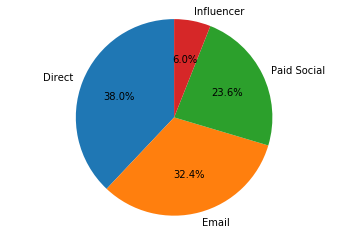

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(df['channel'].value_counts(), labels = df['channel'].value_counts().index, autopct='%1.1f%%', startangle=90)
ax1.axis('equal') 
plt.show() 

##### Distribution of channels across continents

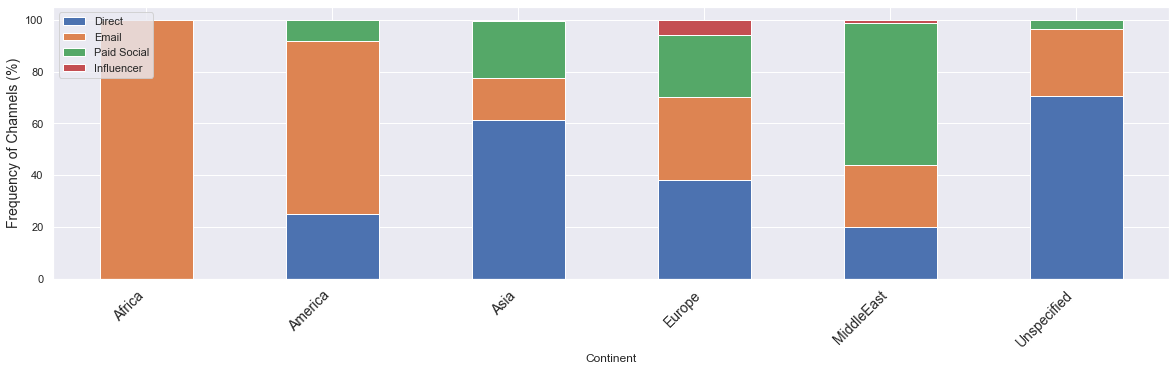

In [ ]:
df1 = df[['Continent', 'Direct', 'Email', 'Paid Social', 'Influencer']].groupby('Continent').sum()
stacked_data = df1.apply(lambda x: x*100/sum(x), axis=1)

_ = stacked_data.plot(kind="bar", stacked=True, figsize=(20,5))
_ = plt.ylabel("Frequency of Channels (%)", fontsize=14)
_=plt.xticks( 
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize=14)

As shown,

 - **Direct** is the most popular channel among **unspecified** regions. Among the known ones, it is more popular in **Asia**.
 - **Email** is the most popular channelone in **Africa** and then in **America**.
 - In **middle East**, **paid social** is most popular.
 - **Influencer** has only few appearances in **Europe** and to a much smaller extent in **Middel East**.

##### Range of numeric variables

As seen below, the maximum values of Quantity and UnitPrice are by far larger than 75% range.

In [ ]:
df.describe()

,Quantity,UnitPrice
count,531283.000000,531283.000000
mean,10.655299,3.898954
std,156.830617,35.876279
min,1.000000,0.000000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,13541.330000


Let's see the frequency of large values for these two variables.

Because of the very large range, box plot doesn't seem an appopriate chart to explore the frequency of these variables in detail. Therefore, we use multiple histograms, instead. 

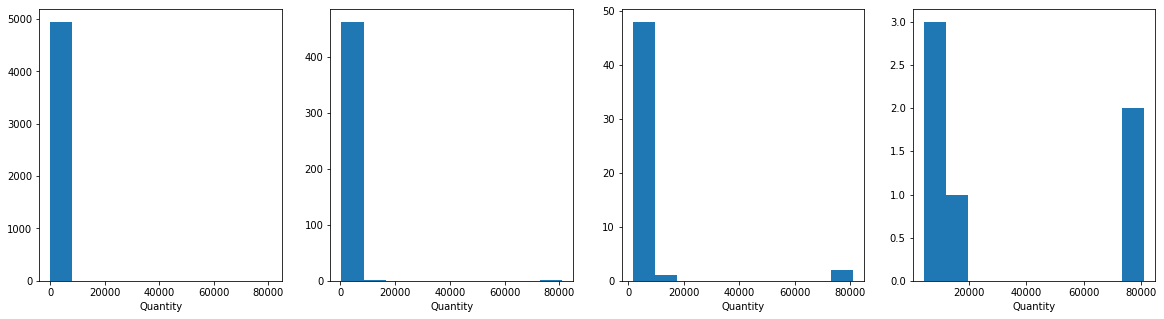

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(141)
_=plt.hist(df[df.Quantity > df.Quantity.quantile(1-0.1**2)]['Quantity']) # in 0.99 %
_=plt.xlabel('Quantity')
plt.subplot(142)
_=plt.hist(df[df.Quantity > df.Quantity.quantile(1-0.1**3)]['Quantity']) # in 0.999 %
_=plt.xlabel('Quantity')
plt.subplot(143)
_=plt.hist(df[df.Quantity > df.Quantity.quantile(1-0.1**4)]['Quantity']) # in 0.9999 %
_=plt.xlabel('Quantity')
plt.subplot(144)
_=plt.hist(df[df.Quantity > df.Quantity.quantile(1-0.1**5)]['Quantity']) # in 0.99999 %
_=plt.xlabel('Quantity')

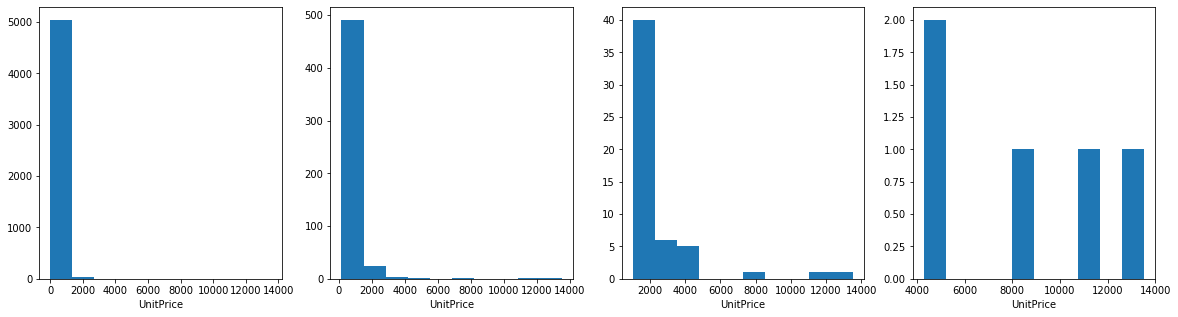

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(141)
_=plt.hist(df[df.UnitPrice > df.UnitPrice.quantile(1-0.1**2)]['UnitPrice']) # in 0.99 %
_=plt.xlabel('UnitPrice')
plt.subplot(142)
_=plt.hist(df[df.UnitPrice > df.UnitPrice.quantile(1-0.1**3)]['UnitPrice']) # in 0.999 %
_=plt.xlabel('UnitPrice')
plt.subplot(143)
_=plt.hist(df[df.UnitPrice > df.UnitPrice.quantile(1-0.1**4)]['UnitPrice']) # in 0.9999 %
_=plt.xlabel('UnitPrice')
plt.subplot(144)
_=plt.hist(df[df.UnitPrice > df.UnitPrice.quantile(1-0.1**5)]['UnitPrice']) # in 0.99999 %
_=plt.xlabel('UnitPrice')

As shown, around only 1% of records (in 99 percentile) associate with these large values.

However, they might be treated as outliers in the analysis step.

##### Variation across the time

In order to discern any potential trend, let's plot the **_total_** value of order against date.

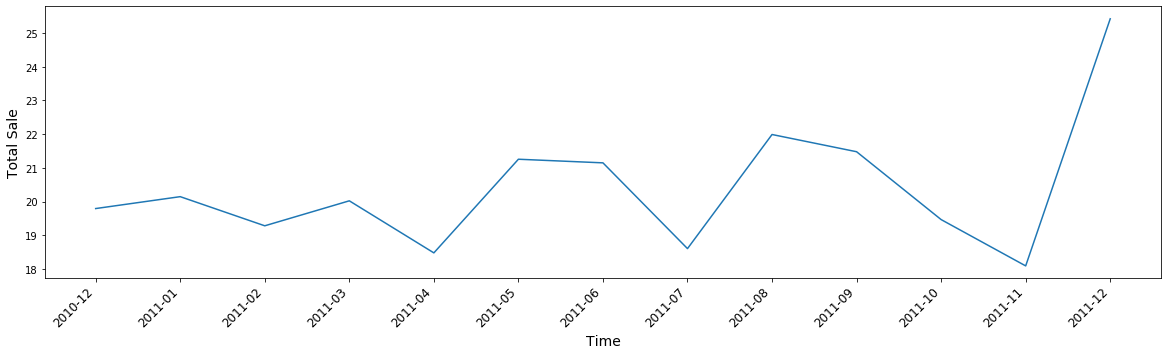

In [ ]:
df1=df.groupby(df['InvoiceDate'].dt.to_period('M')).agg({"TotalPrice": 'mean'})
df1=df1.reset_index(level=['InvoiceDate'])
x = df1['InvoiceDate'].astype(int)

_ = plt.plot(x, df1["TotalPrice"])

ax.set_xticks(df1['InvoiceDate'].astype(int). unique())
ax.set_xticklabels(df1['InvoiceDate'].astype(str).unique())

plt.ylabel('Total Sale', fontsize=14)

plt.xlabel('Time', fontsize=14)

_=plt.xticks( 
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize=12)

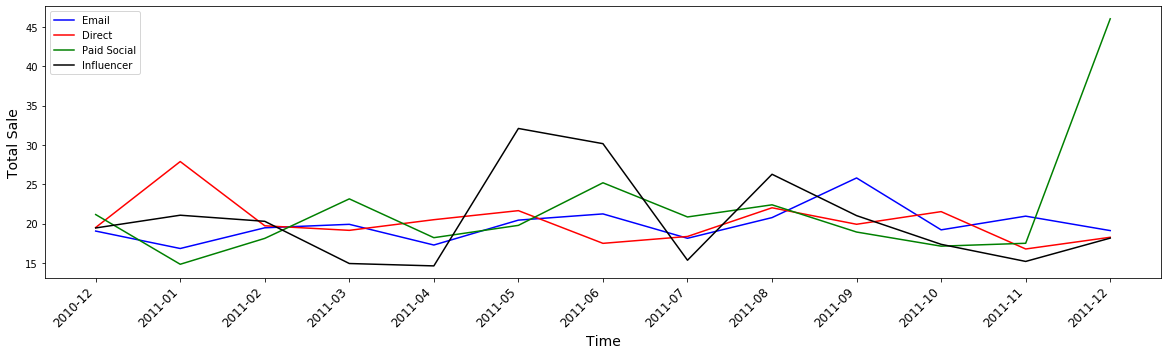

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))

colors=['blue', 'red', 'green', 'black']
for i,channel in enumerate(df.channel.unique()):
    
    df1=df[df['channel']==channel].groupby(df['InvoiceDate'].dt.to_period('M')).agg({"TotalPrice": 'mean'})
    df1=df1.reset_index(level=['InvoiceDate'])
    x = df1['InvoiceDate'].astype(int)

    _ = plt.plot(x, df1["TotalPrice"], label=channel, color=colors[i])

    ax.set_xticks(df1['InvoiceDate'].astype(int). unique())
    ax.set_xticklabels(df1['InvoiceDate'].astype(str).unique())

    plt.ylabel('Total Sale', fontsize=14)

    plt.xlabel('Time', fontsize=14)

    _=plt.xticks( 
        rotation=45,
        horizontalalignment='right',
        fontweight='light',
        fontsize=12)
    
    _=plt.legend()

As indicated, 

 - There is a gradually **increasing** trend in the volume of sales
 - **Paid social** has a huge **spike in December of 2011**
 - **Influencer** drives the **most variation** in the Total Sale while the effect of other channels are comparitively moderate

I develope the `continent_sale` function to plot the results for any given continent. I also adjust it to the period of time - monthly or quarterly - for flexibility in defining the time scale.

In [ ]:
def continent_sale(continent, period):  # 'M': Monthly, 'Q': Quarterly

    fig, ax = plt.subplots(figsize=(20,5))

    colors=['blue', 'red', 'green', 'black']
    for i,channel in enumerate(df.channel.unique()):

        df1=df[(df['channel']==channel) & (df['Continent']==continent)].groupby(df['InvoiceDate'].dt.to_period(period)).agg({"TotalPrice": 'mean'})
        df1=df1.reset_index(level=['InvoiceDate'])
        x = df1['InvoiceDate'].astype(int)

        _ = plt.plot(x, df1["TotalPrice"], label=channel, color=colors[i])

        ax.set_xticks(df1['InvoiceDate'].astype(int). unique())
        ax.set_xticklabels(df1['InvoiceDate'].astype(str).unique())

        plt.ylabel('Total Sale', fontsize=14)

        plt.xlabel('Time', fontsize=14)
        
        if period == 'Q':
            plt.title(continent+' (Quarterly Basis)', fontsize=14)
        else:
            plt.title(continent+' (Monthly Basis)', fontsize=14)

        _=plt.xticks( 
            rotation=45,
            horizontalalignment='right',
            fontweight='light',
            fontsize=12)

        _=plt.legend()

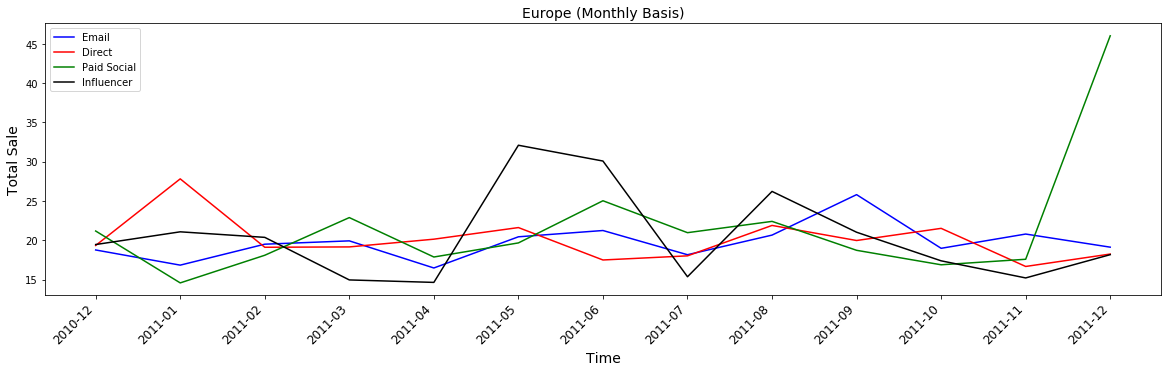

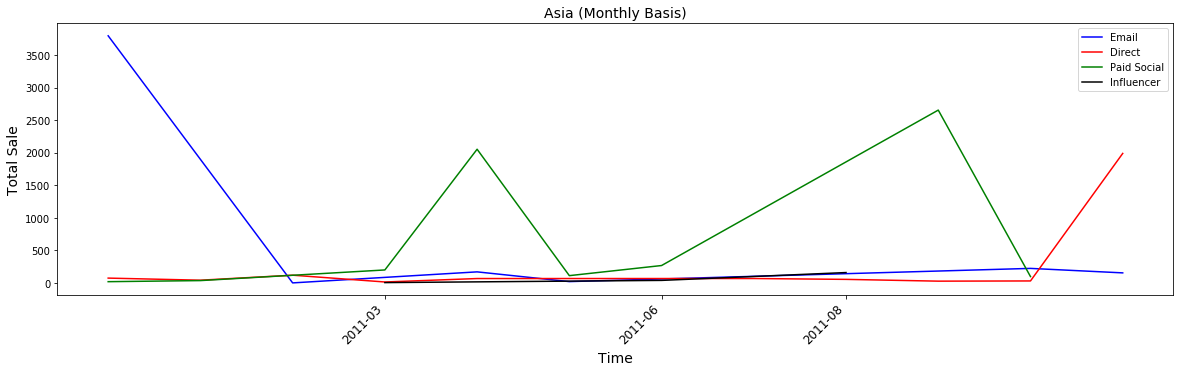

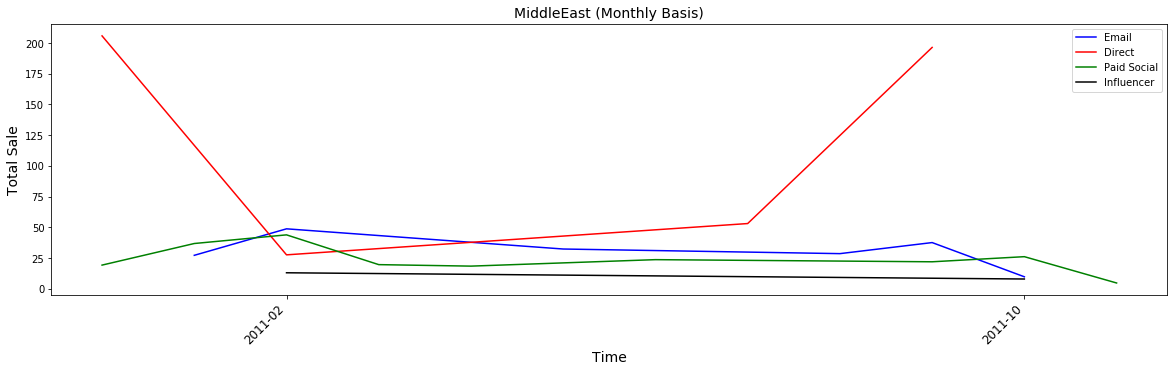

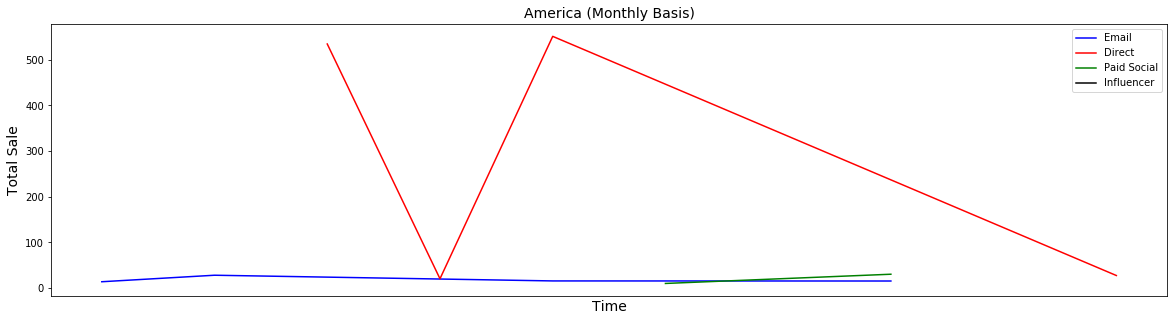

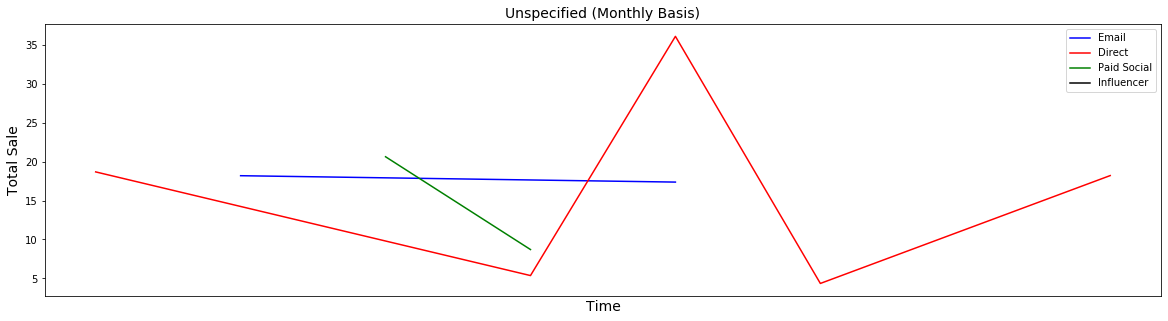

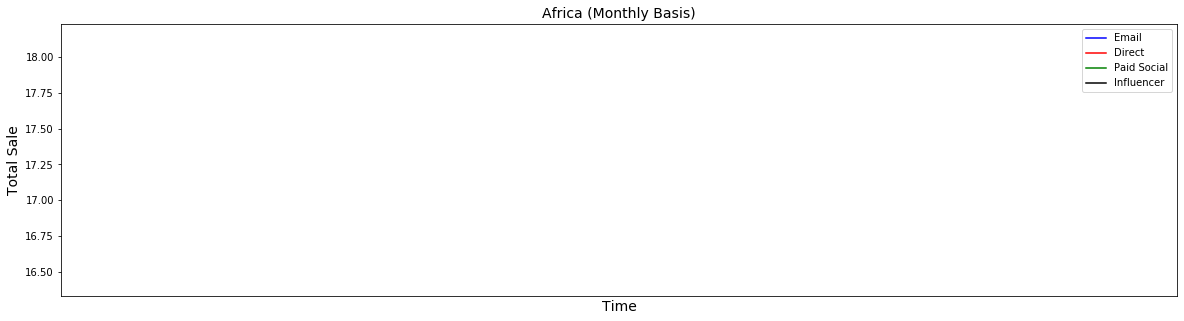

In [ ]:
for continent in df.Continent.unique():
    continent_sale(continent, 'M')

As shown,

 - results are obviously overshadowed by European regions.

- There is no variation for Africa, becuase there is only one day transaction in data for this region, as seen below:

In [ ]:
df[df['Continent']=='Africa']['InvoiceDate'].unique()

# Clustering

array(['2011-10-13T12:50:00.000000000'], dtype='datetime64[ns]')

##### Word frequency

My goal here is to have an idea of **product type** this company sells.

I use word cloud fo this purpose, and as indicated, it looks like that products include a wide range of **home appliances**. 

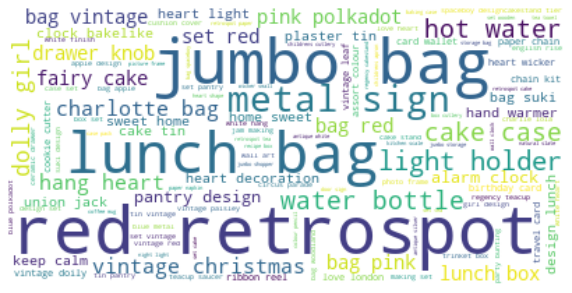

In [ ]:
text_wc = " ".join(item for item in df["Description_lemmatized"])
wordcloud = WordCloud(background_color="white").generate(text_wc)

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show() 

# Clustering

## Clusters - Type 1

First, I'd like to do clustering based on four features:
 - TotalPrice (assumed to correspond with the total sale)
 - channel
 - region
 - time (quarter)

I use k-means clustering instead of hierarchical type.

In order to identify the optimal number of clusters (k), I use elbow curve and select that k which suggests less distortion.

As shown below,**_k=15_** looks like a reasonable number to select.

Text(0.5, 1.0, 'Elbow curve')

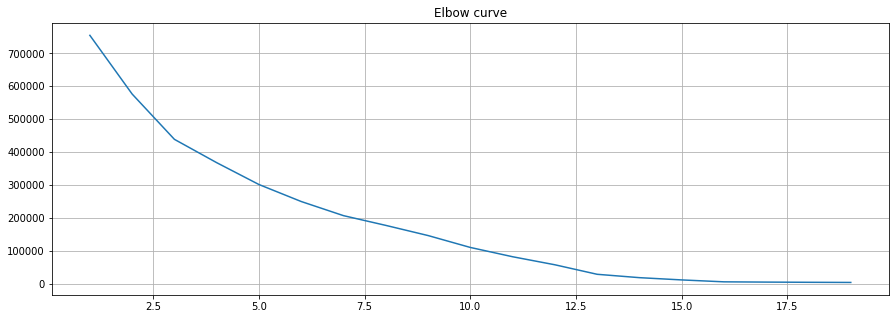

In [ ]:
X = df[['TotalPrice_normalized',
        'Quarter_1', 'Quarter_2', 'Quarter_3', 'Quarter_4', 
        'Africa', 'America', 'Asia', 'Europe', 'MiddleEast', 'Unspecified',
       'Email', 'Direct', 'Paid Social', 'Influencer']] 

distorsions = [] 

for k in range(1, 20): # fit multple k-means
    kmeans = KMeans(n_clusters=k) 
    kmeans.fit(X) 
    distorsions.append(kmeans.inertia_) # saves the distorsions

# plot the distorsions
fig = plt.figure(figsize=(15, 5))

plt.plot(range(1, 20), distorsions) 
plt.grid(True) 
plt.title('Elbow curve') 

In [ ]:
## Fit K-means
model = KMeans(n_clusters = 15) 
model.fit(X) 
labels = model.labels_

df['clusters_1'] = labels+1 # for easy interpretation
df['clusters_1'].value_counts()

4     81440
5     66461
2     48926
3     46748
1     39171
7     37752
8     35472
10    34824
6     31679
11    28971
9     24405
12    22938
13    12699
15    11627
14     7578
Name: clusters_1, dtype: int64

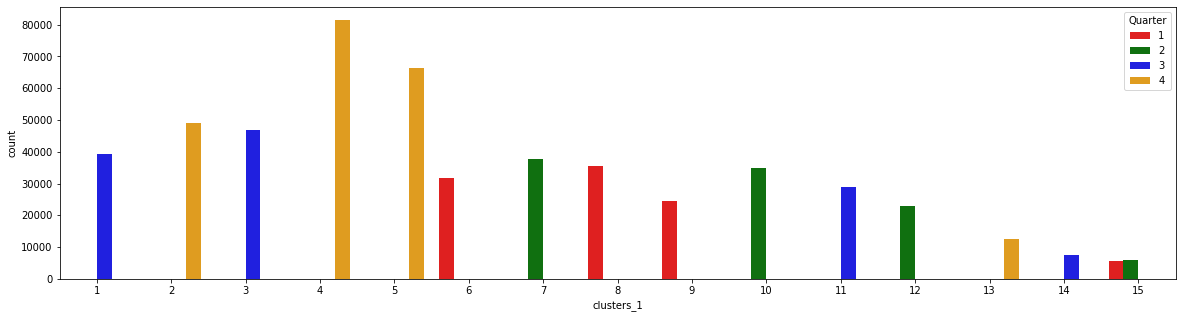

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))

ax=sns.countplot(x='clusters_1', hue = 'Quarter', data = df, palette=['r', 'g', 'b', 'orange']) 

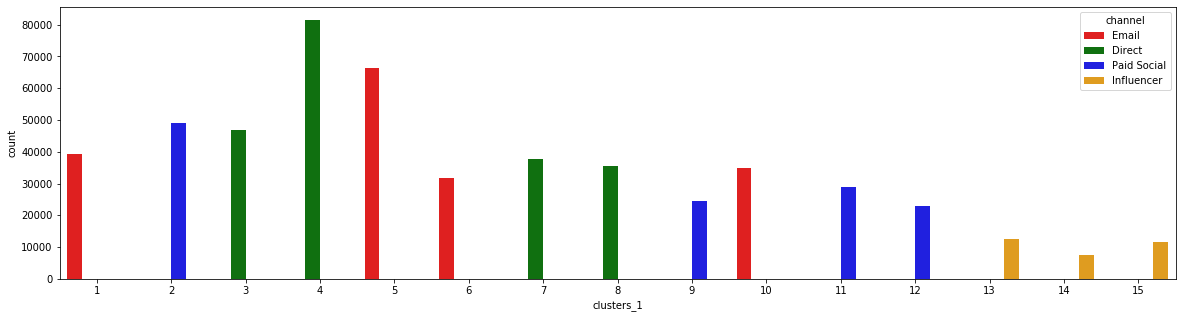

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))

ax=sns.countplot(x='clusters_1', hue = 'channel', data = df, palette=['r', 'g', 'b', 'orange']) 

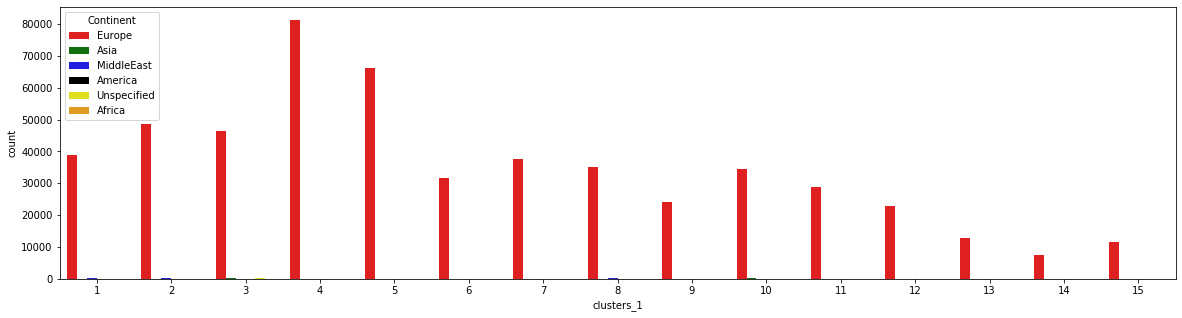

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))

ax=sns.countplot(x='clusters_1', hue = 'Continent', data = df, palette=['r', 'g', 'b', 'black', 'yellow', 'orange', 'grey']) 

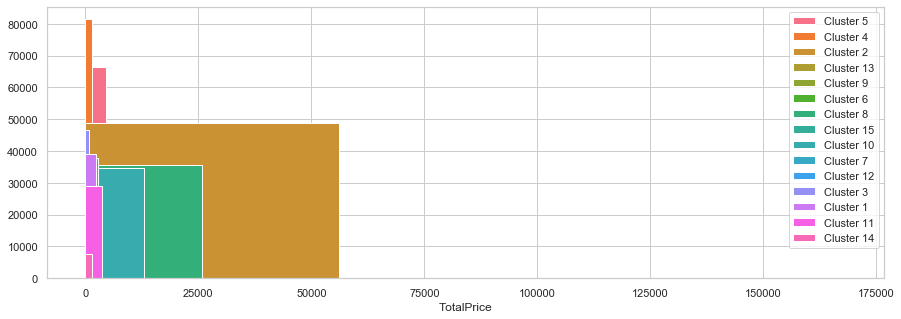

In [ ]:
# This plot, of course, isn't a good way of visualization; however, it enables a quick overview of clusters at the given dimension. 

fig, ax = plt.subplots(figsize=(15,5))

colors = sns.color_palette('husl', n_colors=15)  # a list of RGB tuples

for i, cluster in enumerate(df['clusters_1'].unique()):
    _ = plt.hist(df[df['clusters_1']==cluster]['TotalPrice'], bins = 3, label='Cluster '+str(cluster), color=colors[i])
    plt.xlabel('TotalPrice')
    plt.legend()

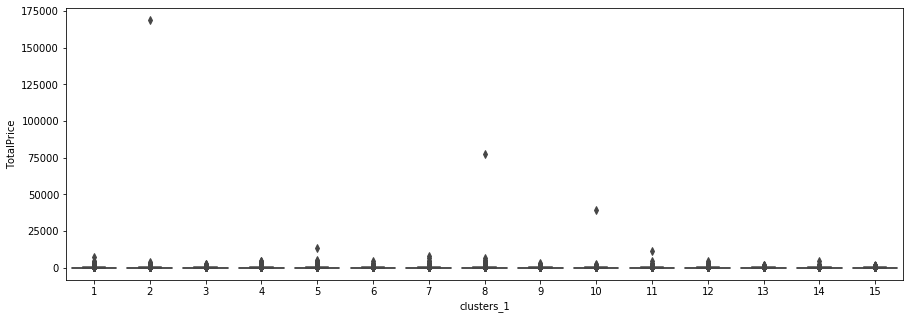

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

ax = sns.boxplot(x="clusters_1", y="TotalPrice", data=df)

Using the *mean of TotalPrice* as a baseline for comparison, we can have a clearer view of boxplots.

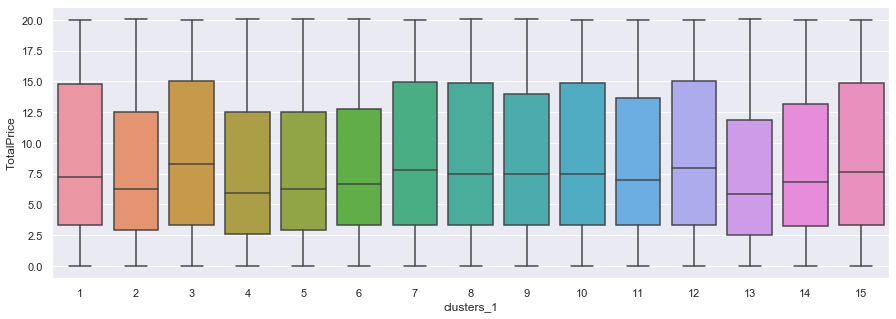

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

ax = sns.boxplot(x="clusters_1", y="TotalPrice", data=df[df['TotalPrice']<df['TotalPrice'].mean()])

As shown above, with 15 clusters, which is relatively a large number, 

- it is difficult to draw a meaningful inference about each cluster's attributes.

- However, it can be said that with respect to **channel and quarter**, almost each cluster associates with **only one of their multiple categories rather than a combination of them**.

- In terms of **regional distribution**, all other clusters are obviuosly overshadowed by **European-based** customers. 

It is worth to **exclude region** from the clustering and repeat the analysis.

<font color='red'>**Important Notice**</font>:

By clustering rows in this manner, some customers will appear in **multiple clusters** and there will be **multiple instances of invoices** for a specific customer even in one cluster.

Given the available features, the only metric which enables us to classify customers in distinct clusters **without overlap between CustomerID** is the **average of TotalPrice for each customer**; however, with only one numeric feature, data-driven clustering looks like pointless, as we simply describe the distribution of customers in a specific range of order volume.

By acknowledge this limitation, we actually accept that some customers **inherit the attributes from multiple clusters**.

However, I'd like to delve into _customers who appeared in only unique cluster_. Below pivot table decently shows the limitation discussed above. 

In [55]:
df1 = df.groupby(['CustomerID', 'clusters_1']).agg({"InvoiceNo": 'count'})
df1

InvoiceNo
CustomerID clusters_1           
12346.0    8                   1
12347.0    1                  22
           4                  42
           5                  47
           7                  42
...                          ...
18283.0    11                 56
           12                 56
           15                 74
18287.0    4                  41
           10                 29

[13038 rows x 1 columns]

Now, I need to extract CustomerID of those appearing in only one cluster.
72 customers meet this condition. 

In [60]:
df2 = df.groupby(['CustomerID']).agg({"clusters_1": 'count'})
single_member = df2[df2['clusters_1']==1].index.values #.reset_index(level=['clusters_1'])
print(len(single_member))
single_member
# pd.DataFrame(df, index = single_member)['clusters_1'].unique() #--> Returns the associated clusters with these single instances

72


array([12346., 13017., 13099., 13106., 13120., 13135., 13185., 13256.,
       13270., 13302., 13307., 13366., 13391., 13703., 13747., 13841.,
       14090., 14351., 14424., 14576., 14705., 15070., 15118., 15195.,
       15313., 15316., 15389., 15510., 15524., 15562., 15657., 15668.,
       15753., 15802., 15823., 15940., 16073., 16078., 16093., 16144.,
       16148., 16323., 16737., 16738., 16742., 16765., 16881., 16953.,
       16990., 17102., 17291., 17331., 17347., 17443., 17715., 17747.,
       17752., 17763., 17846., 17923., 17925., 17948., 17956., 17986.,
       18068., 18084., 18113., 18133., 18174., 18184., 18233., 18268.])

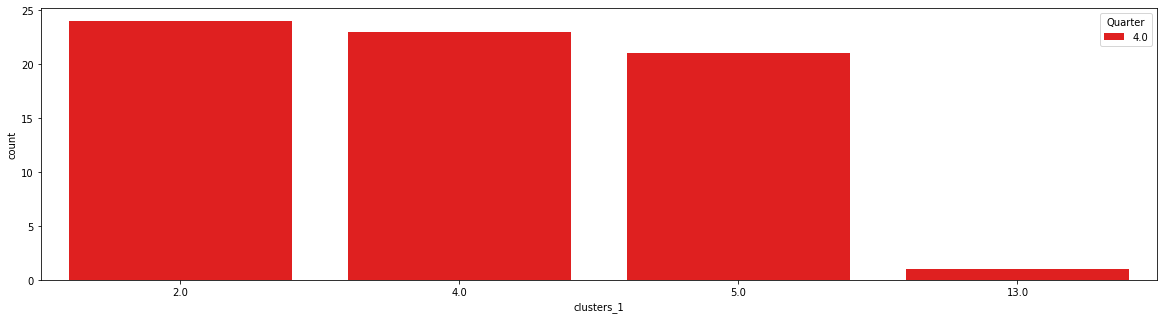

In [61]:
fig, ax = plt.subplots(figsize=(20,5))

ax=sns.countplot(x='clusters_1', hue = 'Quarter', data = pd.DataFrame(df, index = single_member), palette=['r', 'g', 'b', 'orange']) 

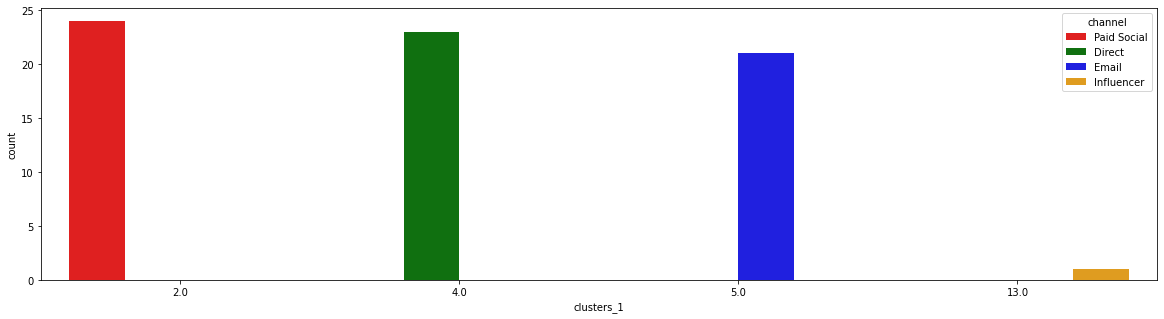

In [74]:
fig, ax = plt.subplots(figsize=(20,5))

ax=sns.countplot(x='clusters_1', hue = 'channel', data = pd.DataFrame(df, index = single_member), palette=['r', 'g', 'b', 'orange']) 

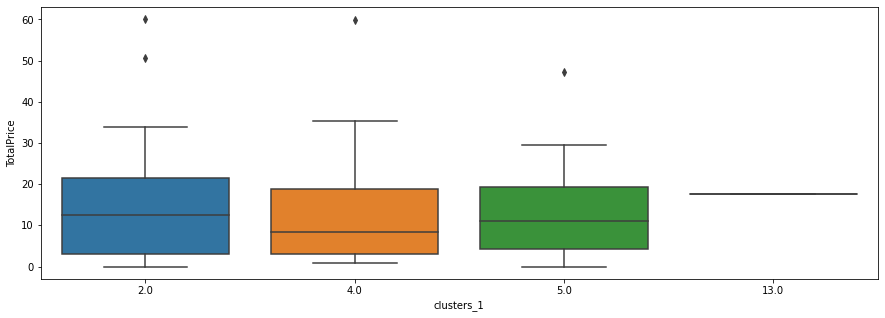

In [75]:
fig, ax = plt.subplots(figsize=(15,5))

ax = sns.boxplot(x="clusters_1", y="TotalPrice", data=pd.DataFrame(df, index = single_member))

As expected, this much simpler output suggests a more interpretable results in terms of customer attributions at each cluster.

 - It represents customers who all order during **winter** but from **different channels and not a combination of them**.

 - The size of order by each cluster mostly fluctuates between \$ 5 and \$ 20. 

## Clusters - Type 2

Text(0.5, 1.0, 'Elbow curve')

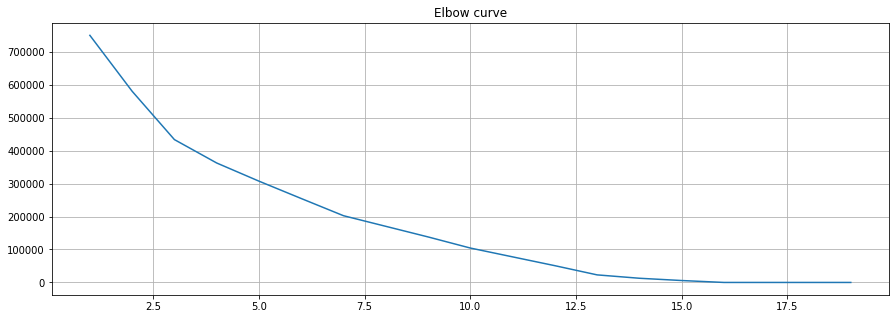

In [ ]:
X = df[['TotalPrice_normalized',
        'Quarter_1', 'Quarter_2', 'Quarter_3', 'Quarter_4', 
       'Email', 'Direct', 'Paid Social', 'Influencer']] 

distorsions = [] 

for k in range(1, 20): # fit multple k-means
    kmeans = KMeans(n_clusters=k) 
    kmeans.fit(X) 
    distorsions.append(kmeans.inertia_) # saves the distorsions

# plot the distorsions
fig = plt.figure(figsize=(15, 5))

plt.plot(range(1, 20), distorsions) 
plt.grid(True) 
plt.title('Elbow curve') 

In [ ]:
## Fit K-means
model = KMeans(n_clusters = 15) 
model.fit(X) 
labels = model.labels_

df['clusters_2'] = labels+1 # for easy interpretation
df['clusters_2'].value_counts()

1     81440
4     66461
3     48926
5     46748
9     39171
7     37752
6     35472
2     34824
10    31679
11    28971
12    24405
8     22938
13    12699
15    11627
14     7578
Name: clusters_2, dtype: int64

As shown, even by excluding regional factor results are exactly the same.

Therefore, in a third attempt, I'd like to **exclude TotalPrice** and do clustering only relying on dummy variables.

## Clusters - Type 3

Text(0.5, 1.0, 'Elbow curve')

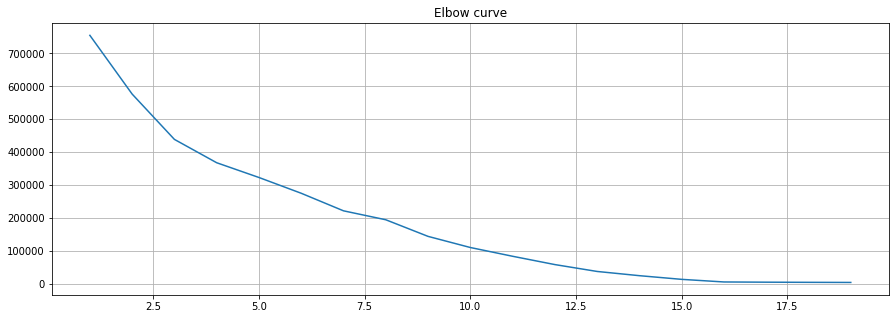

In [ ]:
X = df[[
        'Quarter_1', 'Quarter_2', 'Quarter_3', 'Quarter_4', 
        'Africa', 'America', 'Asia', 'Europe', 'MiddleEast', 'Unspecified',
       'Email', 'Direct', 'Paid Social', 'Influencer']] 

distorsions = [] 

for k in range(1, 20): # fit multple k-means
    kmeans = KMeans(n_clusters=k) 
    kmeans.fit(X) 
    distorsions.append(kmeans.inertia_) # saves the distorsions

# plot the distorsions
fig = plt.figure(figsize=(15, 5))

plt.plot(range(1, 20), distorsions) 
plt.grid(True) 
plt.title('Elbow curve') 

In [ ]:
## Fit K-means
model = KMeans(n_clusters = 15) 
model.fit(X) 
labels = model.labels_

df['clusters_3'] = labels+1 # for easy interpretation
df['clusters_3'].value_counts()

2     81440
3     66461
6     48926
5     46748
7     39171
8     37752
9     35472
10    34824
11    31679
12    28971
4     24405
13    22938
1     13440
14    12699
15     5765
Name: clusters_3, dtype: int64

As shown, even by excluding the continuous variable, we get the same results only with minor differences in 14th and 15th clusters.

However, we can restrict the number of clusters at the expense of maximizing distortion, meaning that clusters won't be discriminated optimally. 

In a last attempt, I do so and report the results.

## Clusters - Type 4

I select  _**k =5**_ and create clusters based on _**all features**_ we selected in the first place. 

In [ ]:
X = df[['TotalPrice_normalized',
        'Quarter_1', 'Quarter_2', 'Quarter_3', 'Quarter_4', 
        'Africa', 'America', 'Asia', 'Europe', 'MiddleEast', 'Unspecified',
       'Email', 'Direct', 'Paid Social', 'Influencer']] 

## Fit K-means
model = KMeans(n_clusters = 5) 
model.fit(X) 
labels = model.labels_

df['clusters_4'] = labels+1 # for easy interpretation
df['clusters_4'].value_counts()

1    128086
2    119972
5    105674
3     95519
4     81440
Name: clusters_4, dtype: int64

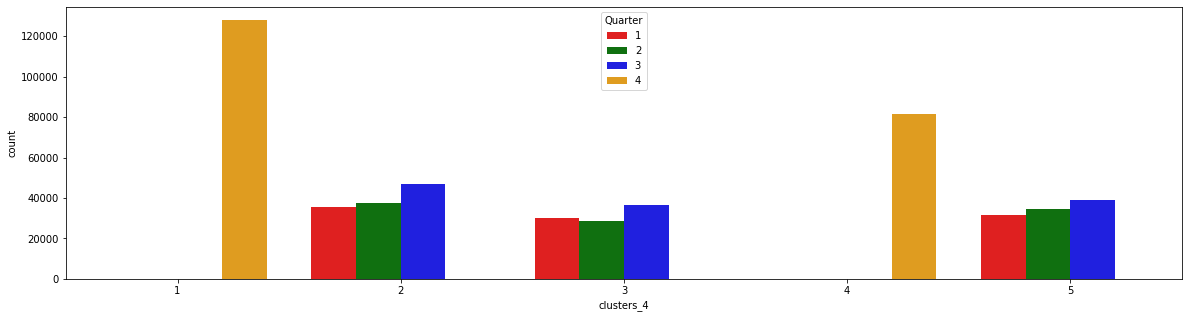

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))

ax=sns.countplot(x='clusters_4', hue = 'Quarter', data = df, palette=['r', 'g', 'b', 'orange']) 

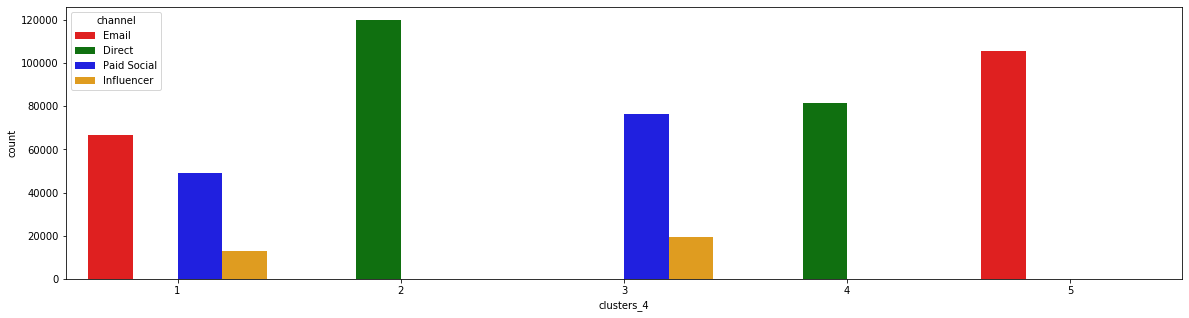

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))

ax=sns.countplot(x='clusters_4', hue = 'channel', data = df, palette=['r', 'g', 'b', 'orange']) 

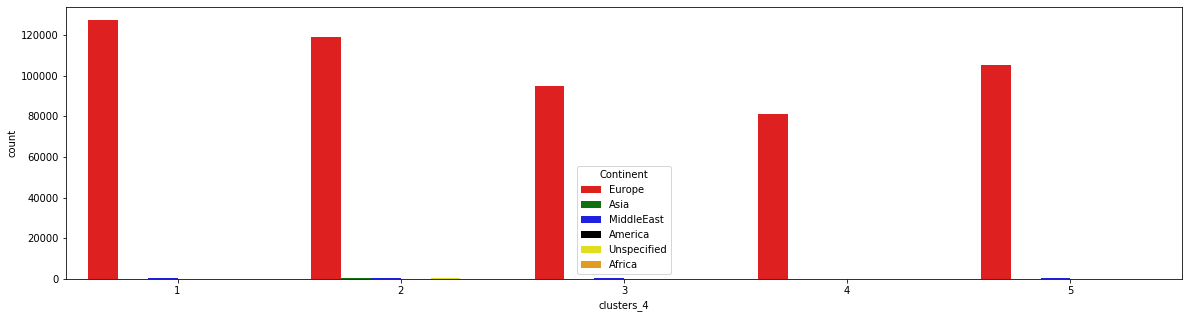

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))

ax=sns.countplot(x='clusters_4', hue = 'Continent', data = df, palette=['r', 'g', 'b', 'black', 'yellow', 'orange', 'grey']) 

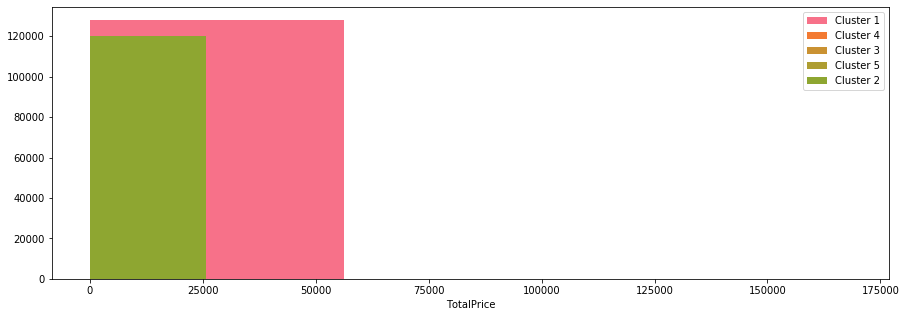

In [ ]:
# This plot, of course, isn't a good way of visualization; however, it enables a quick overview of clusters at the given dimension. 
fig, ax = plt.subplots(figsize=(15,5))

colors = sns.color_palette('husl', n_colors=15)  # a list of RGB tuples

for i, cluster in enumerate(df['clusters_4'].unique()):
    _ = plt.hist(df[df['clusters_4']==cluster]['TotalPrice'], bins = 3, label='Cluster '+str(cluster), color=colors[i])
    plt.xlabel('TotalPrice')
    plt.legend()

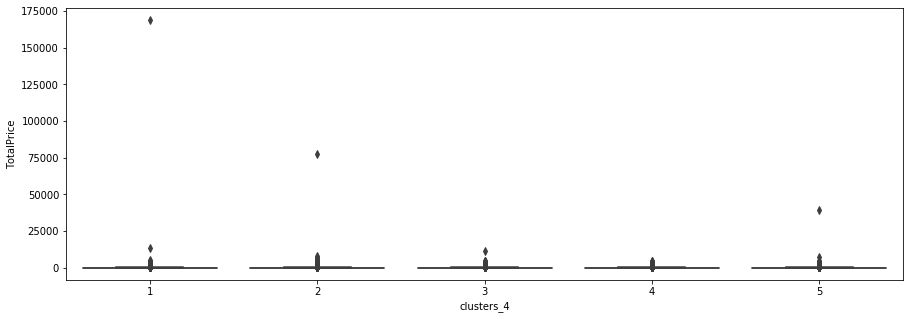

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

ax = sns.boxplot(x="clusters_4", y="TotalPrice", data=df)

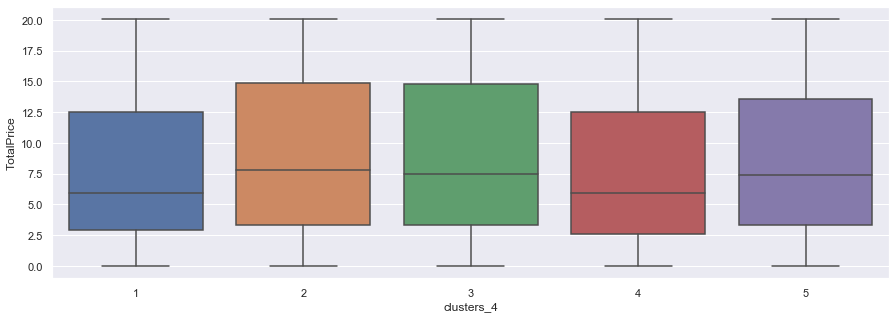

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

ax = sns.boxplot(x="clusters_4", y="TotalPrice", data=df[df['TotalPrice']<df['TotalPrice'].mean()])

As expected, fewer clusters enables to draw some general insights.

 - **Two groups (1,4)** are actively ordering during the **fall** while the other three groups place orders between **winter and summer**. 
 
 - **Two groups (2,4)** prefer **only direct channel**, one group (5) **only Email type**, and the other two a **combination of Email, paid social and influencer**.
     - The appearance of **paid social and influencer together** is interesting.
 - **European based customers** are remarkably noticeable across all clusters. 
 - The **size and range** of total orders from **(1,2) clusters**, includig the most observations from **European countries**, is by far larger than the others'.  

In [ ]:
# save to a new pickle
df.to_pickle("./df3.pkl")

## Clustering  - NLP on Description 

The last attempt to create accurate clusters is to take into account the product type reflected in description column. 

In [ ]:
# I don't need columns generated for lemmetization result
df = pd.concat([df.iloc[:,:-4], tfidf_pd_df], axis=1)

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Month,Quarter,TotalPrice,TotalPrice_normalized,...,vintage,wall,water,white,wicker,wood,wooden,woodland,wrap,zinc
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,12.0,4.0,15.30,0.000091,...,0.0,0.0,0.000000,0.450478,0.0,0.0,0.0,0.0,0.0,0.0
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,12.0,4.0,20.34,0.000121,...,0.0,0.0,0.000000,0.707896,0.0,0.0,0.0,0.0,0.0,0.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,12.0,4.0,22.00,0.000131,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,12.0,4.0,20.34,0.000121,...,0.0,0.0,0.482249,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,12.0,4.0,20.34,0.000121,...,0.0,0.0,0.000000,0.650466,0.0,0.0,0.0,0.0,0.0,0.0


### Clustering

Recently generated dataframe includes many rows with null values. Prior to clustering, these row must be removed.

In [ ]:
df = df.dropna(how='any',axis=0) 

Clustering now needs to be performed on all numeric variables, excluding those transformed earlier.

In [ ]:
cols_exclude = df.dtypes[df.dtypes == object].index.tolist()
cols_exclude
for i in ['InvoiceDate', 'CustomerID','TotalPrice','Quantity', 'UnitPrice', 'Month', 'Quarter']:
    cols_exclude.append(i)
cols_exclude    

['InvoiceNo',
 'StockCode',
 'Description',
 'Country',
 'channel',
 'Continent',
 'InvoiceDate',
 'CustomerID',
 'TotalPrice',
 'Quantity',
 'UnitPrice',
 'Month',
 'Quarter']

Text(0.5, 1.0, 'Elbow curve')

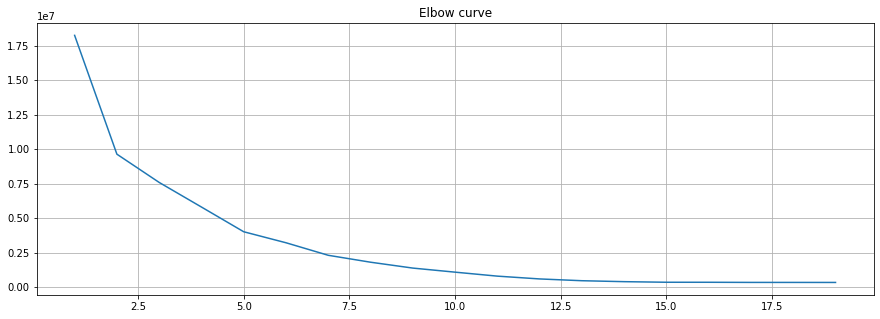

In [ ]:
X = df.drop(cols_exclude, axis=1)

distorsions = [] 

for k in range(1, 20): # fit multple k-means
    kmeans = KMeans(n_clusters=k) 
    kmeans.fit(X) 
    distorsions.append(kmeans.inertia_) # saves the distorsions

# plot the distorsions
fig = plt.figure(figsize=(15, 5))

plt.plot(range(1, 20), distorsions) 
plt.grid(True) 
plt.title('Elbow curve') 

As shown, even by considering description of product (i.e. content of order or attitude toward purchasing item), **still 15 is the optimal number of clusters** to minimize the distortion.

## Clusters_NLP - Type 1

In [ ]:
X = df.drop(cols_exclude, axis=1)

## Fit K-means
model = KMeans(n_clusters = 15) 
model.fit(X) 
labels = model.labels_

df['clusters_NLP_1'] = labels+1 # for easy interpretation
df['clusters_NLP_1'].value_counts()

C:\Users\Goldenhelp.ir\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


7     57552
2     47505
10    37092
8     36669
4     29569
1     29206
6     26386
13    25528
3     22172
11    21709
14    17964
9     16928
5      9632
12     9009
15     4172
Name: clusters_NLP_1, dtype: int64

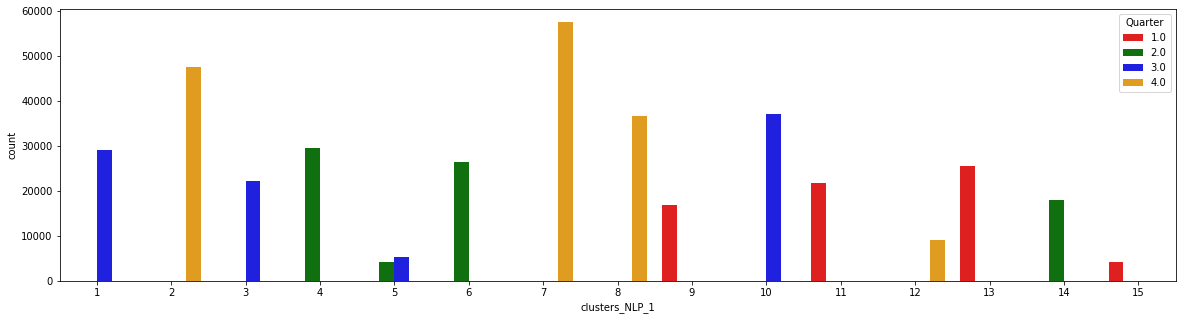

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))

ax=sns.countplot(x='clusters_NLP_1', hue = 'Quarter', data = df, palette=['r', 'g', 'b', 'orange']) 

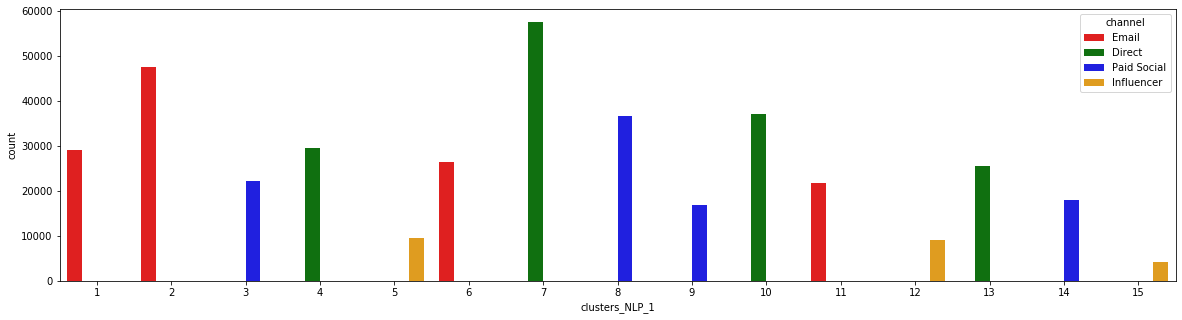

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))

ax=sns.countplot(x='clusters_NLP_1', hue = 'channel', data = df, palette=['r', 'g', 'b', 'orange'])

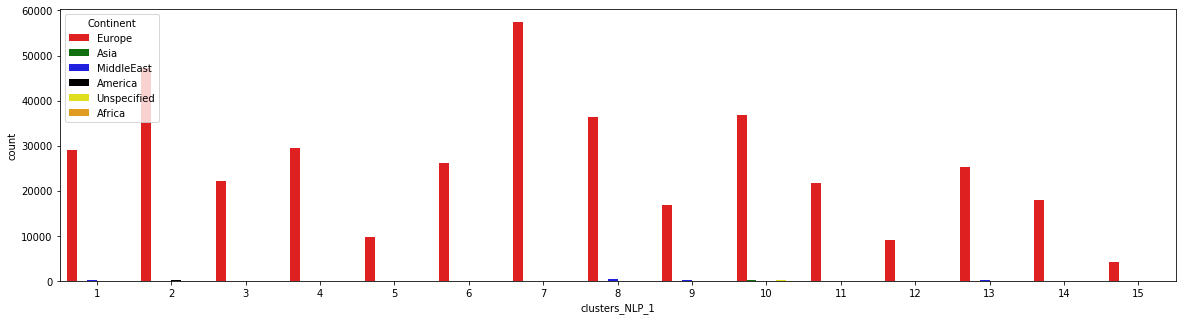

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))

ax=sns.countplot(x='clusters_NLP_1', hue = 'Continent', data = df, palette=['r', 'g', 'b', 'black', 'yellow', 'orange', 'grey']) 

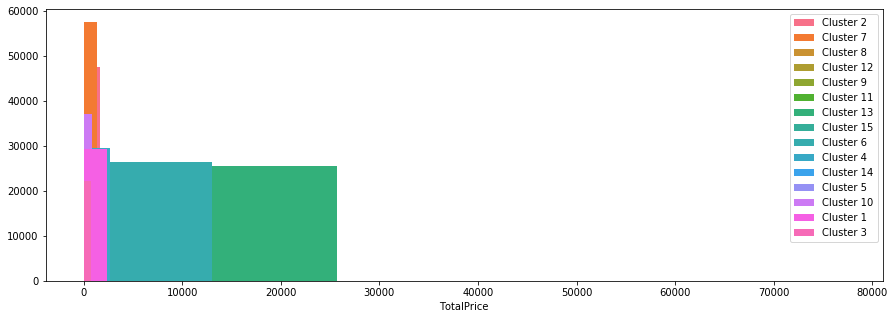

In [ ]:
# This plot, of course, isn't a good way of visualization; however, it enables a quick overview of clusters at the given dimension. 
fig, ax = plt.subplots(figsize=(15,5))

colors = sns.color_palette('husl', n_colors=15)  # a list of RGB tuples

for i, cluster in enumerate(df['clusters_NLP_1'].unique()):
    _ = plt.hist(df[df['clusters_NLP_1']==cluster]['TotalPrice'], bins = 3, label='Cluster '+str(cluster), color=colors[i])
    plt.xlabel('TotalPrice')
    plt.legend()

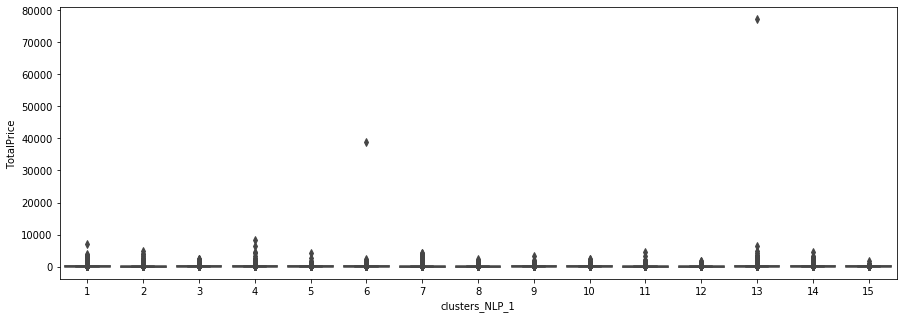

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

ax = sns.boxplot(x="clusters_NLP_1", y="TotalPrice", data=df)

- Recent outputs assign observations to different clusters which because of the inclusion of more information, look like to be _**more reliable**_.

- However, still because of the formation of relatively a large number of clusters discussing on the attributes of clusters compared to each other isn't clear.

- But it can still be seen that almost all clusters associate with **a single type of quarter or channel**, as opposed to a **combination of them**, as observed in the previous step.


## Clusters_NLP - Type 2

Followed by the same discussion from the previous section, I do clustering for **_k = 5_**, for interpretation purpose.

In [ ]:
cols_exclude.append('clusters_NLP_1')
X = df.drop(cols_exclude, axis=1)

## Fit K-means
model = KMeans(n_clusters = 5) 
model.fit(X) 
labels = model.labels_

df['clusters_NLP_2'] = labels+1 # for easy interpretation
df['clusters_NLP_2'].value_counts()

C:\Users\Goldenhelp.ir\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


4    150472
2    103192
3     57552
1     53317
5     26560
Name: clusters_NLP_2, dtype: int64

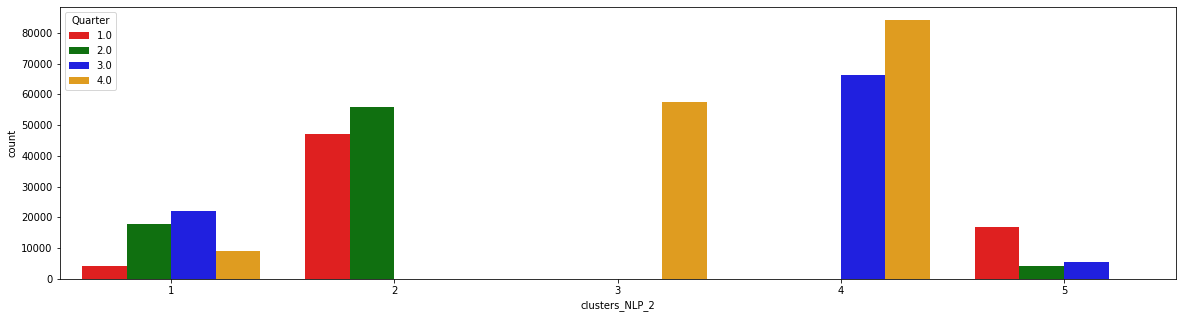

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))

ax=sns.countplot(x='clusters_NLP_2', hue = 'Quarter', data = df, palette=['r', 'g', 'b', 'orange']) 

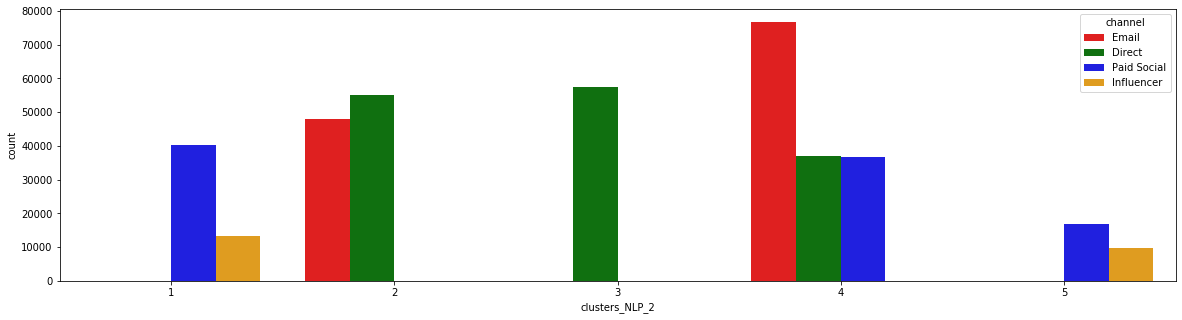

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))

ax=sns.countplot(x='clusters_NLP_2', hue = 'channel', data = df, palette=['r', 'g', 'b', 'orange'])

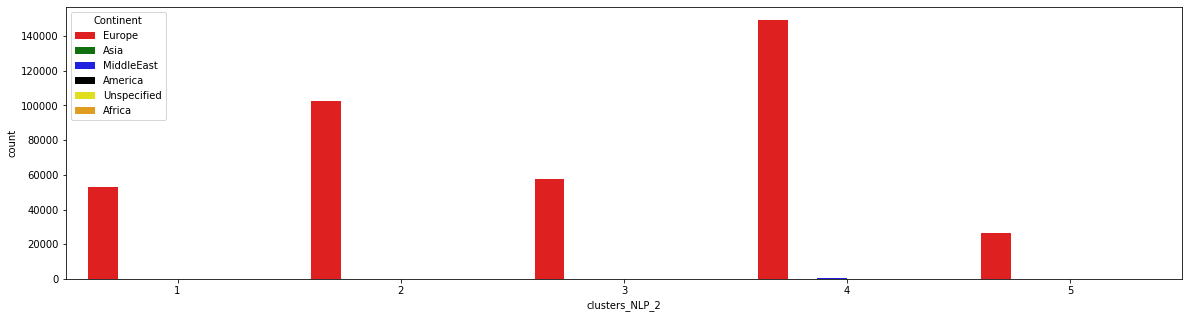

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))

ax=sns.countplot(x='clusters_NLP_2', hue = 'Continent', data = df, palette=['r', 'g', 'b', 'black', 'yellow', 'orange', 'grey']) 

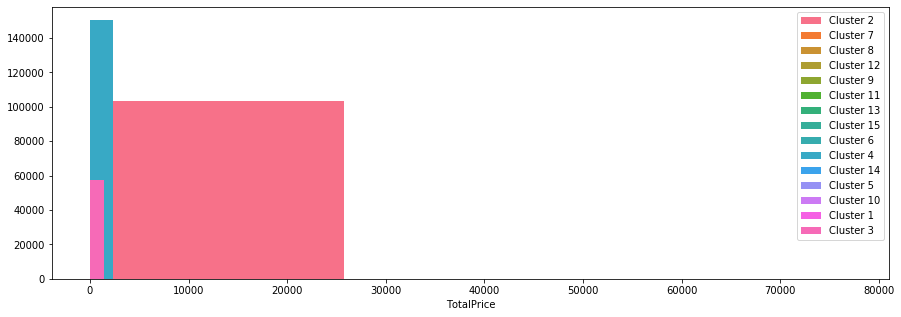

In [ ]:
# This plot, of course, isn't a good way of visualization; however, it enables a quick overview of clusters at the given dimension. 
fig, ax = plt.subplots(figsize=(15,5))

colors = sns.color_palette('husl', n_colors=15)  # a list of RGB tuples

for i, cluster in enumerate(df['clusters_NLP_1'].unique()):
    _ = plt.hist(df[df['clusters_NLP_2']==cluster]['TotalPrice'], bins = 3, label='Cluster '+str(cluster), color=colors[i])
    plt.xlabel('TotalPrice')
    plt.legend()

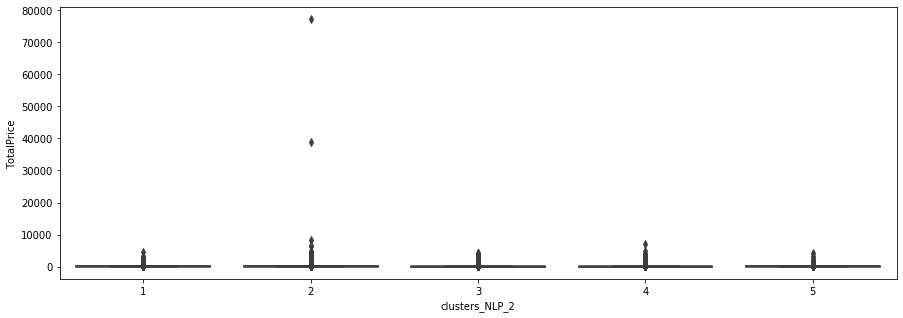

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

ax = sns.boxplot(x="clusters_NLP_2", y="TotalPrice", data=df)

As shown:
 - customers in **cluster 3** place order **only in _winter_ and use only _direct_ channel**. Other customers use **a combination of at least two channels** and order across the year.

 - In particular, order placement of those in **cluster 1** follows a fairly **normal distribution**. 
 - **European-based** customers are prominent, with a **larger volume** and **wider range** of order.

In [ ]:
# save to a new pickle--> exclude tfidf part because of its large size
# Note that this dataframe has a smaller size than the origional one because of removing rows with null values of Description
df = pd.concat([df.iloc[:,:28], df.iloc[:,-2:]], axis=1)
df.to_pickle("./df5.pkl")

# Prediction

In this section, I'll go through different models and featur selection to suggest the best model for the problem.

### Model identification

I develpe `Model_order` function which enables to split data into train and test sets _for any given date cut-ff_. Here, fall quarter is the test set.

I created a new binary column, called **repeat** for train and test sets, seperately, simply by assigning **1** to customers with **more than one instances** (number of associated invoices, for example) in data. This column would be treated as the **outcome variable** in the model. 

I begin by creating models using _traditional_ classification alghorithms:
 - logistic regression
 - decision trees
 - random forest
 - k-nn

In [101]:
# Creating models
def Model_order (IVs, split_time): 

    # Splitting on specific time
    df_train = df[df['InvoiceDate']< split_time]
    df_test = df[df['InvoiceDate']>= split_time]

    # Defenition of outcome variable and binarizing it
    df_train['Invoice_Num'] = df_train.groupby('CustomerID')['CustomerID'].transform('count')
    df_train['repeat'] = df_train['Invoice_Num'].apply(lambda x: 1 if x > 1 else 0)
    X_train = df_train[IVs]
    Y_train = df_train['repeat']

    df_test['Invoice_Num'] = df_test.groupby('CustomerID')['CustomerID'].transform('count')
    df_test['repeat'] = df_test['Invoice_Num'].apply(lambda x: 1 if x > 1 else 0)    
    X_test = df_test[IVs] 
    Y_test = df_test['repeat']
     
    # fitting models   
    # Logistic Regression
    lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')
    lr.fit(X_train, Y_train)
    
    # Decision Trees
    dt = DecisionTreeClassifier(criterion = 'gini', splitter='best', max_depth=15)
    dt.fit(X_train, Y_train)
    
    # Random Forests
    rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
    rf.fit(X_train, Y_train)
    
    # K-NN
    knn = KNeighborsClassifier(n_neighbors = 5)
    knn.fit(X_train, Y_train)
    
    return lr, dt, rf, knn, X_train, X_test, Y_train, Y_test

First, I don't incorporate description column in predictive modeling and try to assess the performance with a limitted number of features.

Therefore, I just exclude non-numeric and ordinal variables from data.

In [102]:
# Determining Inedependent variables
cols_exclude = df.dtypes[df.dtypes == object].index.tolist()
for i in ['InvoiceDate', 'CustomerID','TotalPrice','Quantity', 'UnitPrice', 'Month', 'Quarter', 'clusters_1', 'clusters_2', 'clusters_3', 'clusters_4']:
    cols_exclude.append(i)
    
IVs = df.drop(cols_exclude, axis=1).columns

lr, dt, rf, knn, X_train, X_test, Y_train, Y_test = Model_order (IVs,'2011-10-1')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

### Model assessment

`perf_assess` function helps to return the four main accuracy measures for any modle that we choose. 
 - **threshold of probability** that I specified as an argument in this function is actually pointless for this problem because all cases have the probability of nearly 1. However, I included it for the purpose of _generalization_.

`auc_order` is the second function which returns ROC curve along with AUC value for any given model.

In [103]:
# Classification metrics
def perf_assess(inp_set, out_actual, threshold, model): # model: lr, dt, rf, knn
    
    out_prob = model.predict_proba(X=inp_set)
    out_pred = binarize([out_prob[:, 1]], threshold)[0]
    
    Precesion=precision_score(out_actual, out_pred)
    Recall=recall_score(out_actual, out_pred)
    F1_Score=f1_score(out_actual, out_pred)
    
    cm = confusion_matrix(out_actual, out_pred)
    Accuracy = (cm[0,0]+cm[1,1])/sum(sum(cm))
    
    return Accuracy, Precesion, Recall, F1_Score

In [105]:
dfperf=pd.DataFrame(columns = ['Accuracy', 'Precesion', 'Recall', 'F1_Score'], index = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'k-NN'])
dfperf.loc['Logistic Regression',:] = perf_assess(X_test, Y_test, 0.5, lr) 
dfperf.loc['Decision Tree',:] = perf_assess(X_test, Y_test, 0.5, lr)
dfperf.loc['Random Forest',:] = perf_assess(X_test, Y_test, 0.5, rf) 
dfperf.loc['k-NN',:] = perf_assess(X_test, Y_test, 0.5, knn) 

dfperf # on test set

,Accuracy,Precesion,Recall,F1_Score
Logistic Regression,0.782694,0.782735,0.999764,0.878037
Decision Tree,0.782694,0.782735,0.999764,0.878037
Random Forest,0.781378,0.783457,0.995813,0.876962
k-NN,0.75148,0.805904,0.898843,0.84984


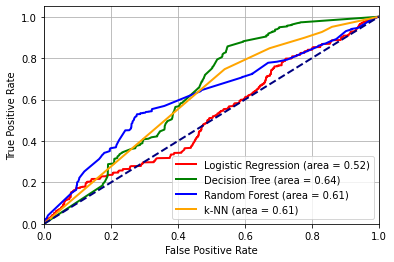

In [122]:
# ROC curve - AUC measure
def auc_order(inp_set, out_actual, model, color):

  out_prob=model.predict_proba(inp_set) 
  fpr, tpr, thresholds = metrics.roc_curve(out_actual, out_prob[:, 1])
  if model==lr:
    legend='Logistic Regression (area = %0.2f)'
  elif model == dt:
    legend='Decision Tree (area = %0.2f)'
  elif model == rf:
    legend='Random Forest (area = %0.2f)'
  elif model == knn:
    legend='k-NN (area = %0.2f)'
  else:
    legend='ANN (area = %0.2f)'
  plt.plot(fpr, tpr, color=color,lw=2, label=legend % auc(fpr, tpr))

# Plot the curve
plt.figure()
auc_order(X_test, Y_test, lr, 'red')
auc_order(X_test, Y_test, dt, 'green')
auc_order(X_test, Y_test, rf, 'blue')
auc_order(X_test, Y_test, knn, 'orange')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()  

- Based on the first four accuracy metrics, it looks like that the all model perform closely and **logistic regression and decision trees** are better to some extent.

- However, based on ROC or AUC metric, **logistc regression's** predictions are almost **random guessing (AUC~50%)** while those of other models are better to some extent.

- Generally speaking, the classification performance isn't really good because it **fails to acheive more than 64% rate**. However, I'll select **desision trees** for the next steps of analysis as it is the **best candidate** as of now.

### Exploring the candidate model

In [124]:
dfperf_dt=pd.DataFrame(columns = ['Accuracy', 'Precesion', 'Recall', 'F1_Score'], index = ['Train', 'Test'])
dfperf_dt.loc['Train',:] = perf_assess(X_train, Y_train, 0.5, dt) 
dfperf_dt.loc['Test',:] = perf_assess(X_test, Y_test, 0.5, dt) 

dfperf_dt

,Accuracy,Precesion,Recall,F1_Score
Train,0.890558,0.914652,0.938571,0.926457
Test,0.761831,0.848067,0.847408,0.847737


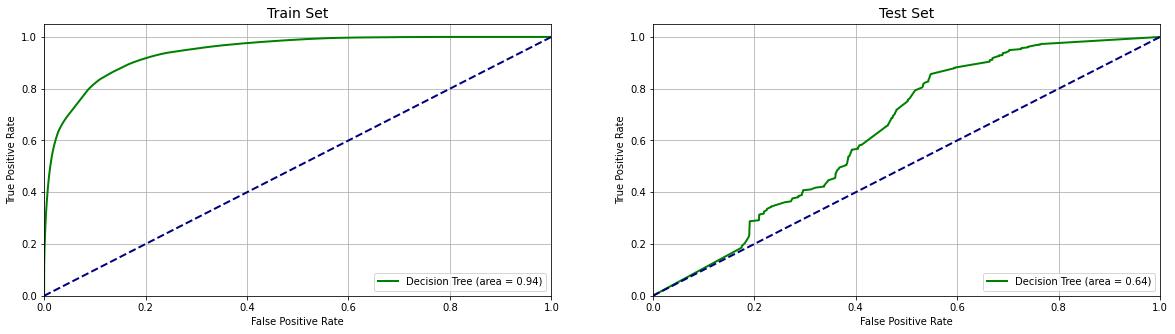

In [130]:
# ROC curve
plt.figure(figsize=(20,5))

plt.subplot(121)
auc_order(X_train, Y_train, dt, 'green')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('Train Set', fontsize = 14)
plt.grid(True)
 
plt.subplot(122)
auc_order(X_test, Y_test, dt, 'green')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('Test Set', fontsize = 14)
plt.grid(True)

plt.show() 

In [131]:
# Confusion matrix
print("Confusion Matrix for The Test Set:")
conf_mat_test = confusion_matrix(y_true=Y_test, y_pred=dt.predict(X_test))
conf_mat_test

Confusion Matrix for The Test Set:


array([[ 16592,  19944],
       [ 20046, 111324]])

In [132]:
# Confusion matrix
print("Confusion Matrix for The Train Set:")
conf_mat_train = confusion_matrix(y_true=Y_train, y_pred=dt.predict(X_train))
conf_mat_train

Confusion Matrix for The Train Set:


array([[ 72995,  23336],
       [ 16368, 250086]])

As shown above and as indicated by the ROC curve for train and test sets, our decision trees model in noticeably **over-fitted**.

### Improving the model

As mentioned earlier, I excluded the effect of product type (Description column) from the analysis.

However, it makes sense that the **type of product itself** acts as a motive for repeating some orders or transactions.

I this regard, by using **tfidf matrix** that I created before, I'd like to include **Description** column in the process of predection. 

In [146]:
df = pickle.load( open( "df3.pkl", "rb" ) )
tfidf_pd_df = pickle.load( open( "tfidf.pkl", "rb" ) )
df.drop(['clusters_1', 'clusters_2', 'clusters_3', 'clusters_4'], axis=1, inplace=True)
df = pd.concat([df, tfidf_pd_df], axis=1)

In [149]:
# we need to remove rows with null values, resulting in fewer records
df = df.dropna(how='any',axis=0)
len(df)

391093

In [150]:
# Splitting on specific time
df_train = df[df['InvoiceDate']<'2011-10-1']
df_test = df[df['InvoiceDate']>='2011-10-1']

# Defenition of outcome variable and binarizing it
df_train['Invoice_Num'] = df_train.groupby('CustomerID')['CustomerID'].transform('count')
df_train['repeat'] = df_train['Invoice_Num'].apply(lambda x: 1 if x > 1 else 0)

df_test['Invoice_Num'] = df_test.groupby('CustomerID')['CustomerID'].transform('count')
df_test['repeat'] = df_test['Invoice_Num'].apply(lambda x: 1 if x > 1 else 0)

# Determining Inedependent variables
# Here I include quarter columns from IVs for the purpose of generalization 
cols_exclude = df.dtypes[df.dtypes == object].index.tolist()
for i in ['InvoiceDate', 'CustomerID','TotalPrice','Quantity', 'UnitPrice', 'Month', 'Quarter']:
    cols_exclude.append(i)
    
IVs = df.drop(cols_exclude, axis=1).columns
X_train = df_train[IVs]
X_test = df_test[IVs]  
 
Y_train = df_train['repeat']
Y_test = df_test['repeat']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [151]:
# Decision Trees
dt = DecisionTreeClassifier(criterion = 'gini', splitter='best', max_depth=15)
dt.fit(X_train, df_train['repeat'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [153]:
dfperf_dt=pd.DataFrame(columns = ['Accuracy', 'Precesion', 'Recall', 'F1_Score'], index = ['Train', 'Test'])
dfperf_dt.loc['Train',:] = perf_assess(X_train, Y_train, 0.5, dt) 
dfperf_dt.loc['Test',:] = perf_assess(X_test, Y_test, 0.5, dt) 

dfperf_dt

,Accuracy,Precesion,Recall,F1_Score
Train,0.999899,0.999917,0.999981,0.999949
Test,0.999591,0.999735,0.999855,0.999795


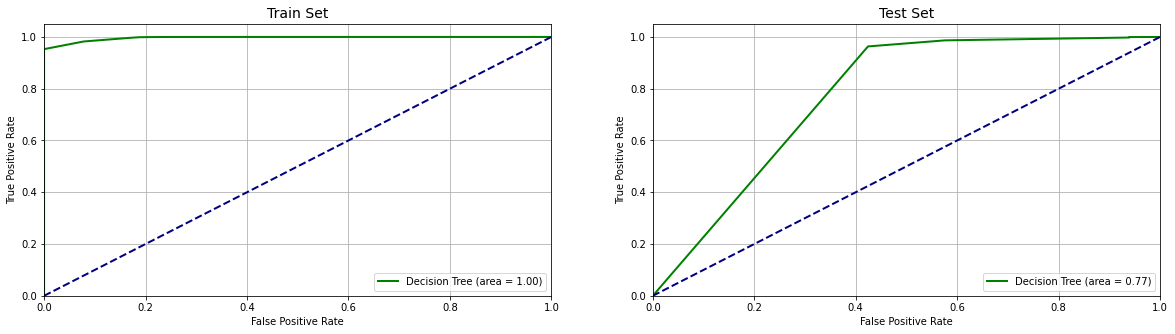

In [155]:
# ROC curve
plt.figure(figsize=(20,5))

plt.subplot(121)
auc_order(X_train, Y_train, dt, 'green')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('Train Set', fontsize = 14)
plt.grid(True)
 
plt.subplot(122)
auc_order(X_test, Y_test, dt, 'green')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('Test Set', fontsize = 14)
plt.grid(True)

plt.show() 

As shown, inclusion of tokens in the model **improves the accuracy significantly (~20%)**. 

However, the modle still indicates signs of **over-fitting**.



### Alternate models

Using **neural network** as an alternate model is likely to improve the results to a greater extent. 

Accordingly, I create a **multi-layer perceptron structure**, with two hidden layers, 5 nodes on each, over the train set.  

In [157]:
mlp = MLPClassifier()

# set the hyper parameter grid
hyper_parameter_space = {
    'hidden_layer_sizes': [(5,5,5), (3,2,3), (3,5), (10, 10)], 
    'activation': ['tanh', 'relu'],
    'learning_rate': ['constant','adaptive'], 'alpha': [0.01] # I can adjus alpha to a larger value to reduce overfitting
}

mlp_gr_src = RandomizedSearchCV(mlp, hyper_parameter_space, n_iter = 5, cv = 10, random_state = 123, scoring = 'accuracy') 

# fit the ml (with random grid search) on the train data
mlp_gr_src.fit(X=X_train, y=Y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                           batch_size='auto', beta_1=0.9,
                                           beta_2=0.999, early_stopping=False,
                                           epsilon=1e-08,
                                           hidden_layer_sizes=(100,),
                                           learning_rate='constant',
                                           learning_rate_init=0.001,
                                           max_fun=15000, max_iter=200,
                                           momentum=0.9, n_iter_no_change=10,
                                           nesterovs_momentum=True, power_t=0.5,
                                           rando...
                                           validation_fraction=0.1,
                                           verbose=False, warm_start=False),
                   iid='deprecated

In [158]:
# save the predictor for future use
filename = 'mlp.sav'
pickle.dump(mlp_gr_src, open(filename, 'wb'))

In [159]:
dfperf_ann=pd.DataFrame(columns = ['Accuracy', 'Precesion', 'Recall', 'F1_Score'], index = ['Train', 'Test'])
dfperf_ann.loc['Train',:] = perf_assess(X_train, Y_train, 0.5, mlp_gr_src) 
dfperf_ann.loc['Test',:] = perf_assess(X_test, Y_test, 0.5, mlp_gr_src) 

dfperf_ann

,Accuracy,Precesion,Recall,F1_Score
Train,0.99976,0.99976,1,0.99988
Test,0.999735,0.999735,1,0.999868


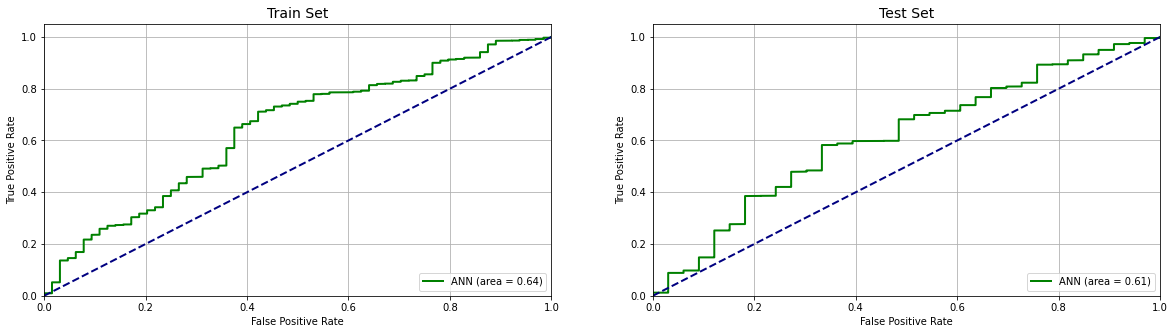

In [163]:
# ROC curve
plt.figure(figsize=(20,5))

plt.subplot(121)
auc_order(X_train, Y_train, mlp_gr_src, 'green')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('Train Set', fontsize = 14)
plt.grid(True)
 
plt.subplot(122)
auc_order(X_test, Y_test, mlp_gr_src, 'green')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('Test Set', fontsize = 14)
plt.grid(True)

plt.show() 

 - As expected, neural network makes improvements on the four main accuracy measures; however, in terms of **AUC value**, decision trees still performs better. 

- It should be noted that, adjusting alpha value which is set to 0.01 here is likely to improve the results .

- In conclusion, _**decision trees is a reasonable model to identify returning customers**_.

### Final remarks

In [ ]:
df_train.repeat.value_counts()

1    266454
0     96331
Name: repeat, dtype: int64

In [ ]:
df_test.repeat.value_counts()

1    131370
0     36536
Name: repeat, dtype: int64

As shown above, data is **imbalanced** with respect to the outcome variable.

Ideally, we should use **undersampling** or **SMOTE** techniques to balance data and repeat the analysis. 

However, at the moment, I won't go in details of this step for the purpose of curent task.

Additionally, the first time that I read the question my understanding was that we'd like to _**predict those customers who had orders during the first three quarters and will return in the fourth quarter**_. 

This type of question would be more challenging as my realization is that it demands the application of *time-series models*, for *any individul*, to return meaningful results.